<div align="center">
 
  <h1 style="color: #4A4A4A;">Trent University</h1>
  <h2 style="color: #6A6A6A;">School of Graduate Studies</h2>
  <hr style="width: 50%; border-top: 2px solid #4A4A4A;">
</div>

<h2 style="color: #008080; text-align: center;">Source Code</h2>

<table align="center">
  <tr>
    <td><strong>Course Name:</strong></td>
    <td>AMOD-5430H - Data Visualization</td>
  </tr>
</table>

<h3 style="color: #4A4A4A; text-align: center;">Submitted By:</h3>

<table align="center">
  <tr>
    <td><strong>Sabrina Farzana</strong></td>
    <td>ID: 0792500</td>
  </tr>
  <tr>
    <td><strong>Md Abdul Ahad</strong></td>
    <td>ID: 0800060</td>
  </tr>
</table>

<p style="text-align: center; font-style: italic; color: #6A6A6A;">
  Date of Submission: July 15, 2024
</p>

<div style="text-align: center; margin-top: 20px;">
  
</div>

Step 1: Import Libraries and Load Data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

# Loading the dataset
df = pd.read_csv("F:\JN-Project\healthcare_dataset.csv")

# Displaying the first few rows
print(df.head().T)

                                  0                1                 2  \
Name                  Bobby JacksOn     LesLie TErRy       DaNnY sMitH   
Age                              30               62                76   
Gender                         Male             Male            Female   
Blood Type                       B-               A+                A-   
Medical Condition            Cancer          Obesity           Obesity   
Date of Admission        2024-01-31       2019-08-20        2022-09-22   
Doctor                Matthew Smith  Samantha Davies  Tiffany Mitchell   
Hospital            Sons and Miller          Kim Inc          Cook PLC   
Insurance Provider       Blue Cross         Medicare             Aetna   
Billing Amount         18856.281306     33643.327287      27955.096079   
Room Number                     328              265               205   
Admission Type               Urgent        Emergency         Emergency   
Discharge Date           2024-02-02   

Step 2: Data Overview

In [34]:
# Seeing basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:

# Summary statistics for numerical features
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [5]:

# Summary statistics for categorical features
df.describe(include=['O'])

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27774,6969,9308,50,27,44,11249,18655,53,11140,18627


In [6]:
#Data Preprocessing and Cleaning
# Checking for missing values
print(df.isna().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import plotly.express as px
import sklearn
import warnings

warnings.filterwarnings('ignore')

# Read the CSV file
df = pd.read_csv("F:/JN-Project/healthcare_dataset.csv")

# Display the first few rows of the dataframe
print("Original Data:")
print(df.head().T)

# Column Removal and Renaming
# Exclude columns that are not relevant for analysis
columns_to_exclude = ['Name', 'Room Number']
data_1 = df.drop(columns=columns_to_exclude)

# Standardize column names by converting spaces to underscores
data_1.columns = [col.replace(' ', '_') for col in data_1.columns]

# Display the new column names to confirm changes
print("\nColumn Names After Renaming:")
print(data_1.columns)

# Data Type Conversion
# Convert 'Date_of_Admission' and 'Discharge_Date' from string to datetime format
data_1['Date_of_Admission'] = pd.to_datetime(data_1['Date_of_Admission'], errors='coerce')
data_1['Discharge_Date'] = pd.to_datetime(data_1['Discharge_Date'], errors='coerce')

# Verify data types of columns to ensure correct conversion
print("\nData Types After Conversion:")
print(data_1.dtypes)

# Save the cleaned DataFrame to a new CSV file (optional)
cleaned_file_path = 'F:/JN-Project/cleaned_healthcare_data.csv'
data_1.to_csv(cleaned_file_path, index=False)

# Display the first few rows of the cleaned dataset to verify changes
print("\nCleaned Data:")
print(data_1.head())



Original Data:
                                  0                1                 2  \
Name                  Bobby JacksOn     LesLie TErRy       DaNnY sMitH   
Age                              30               62                76   
Gender                         Male             Male            Female   
Blood Type                       B-               A+                A-   
Medical Condition            Cancer          Obesity           Obesity   
Date of Admission        2024-01-31       2019-08-20        2022-09-22   
Doctor                Matthew Smith  Samantha Davies  Tiffany Mitchell   
Hospital            Sons and Miller          Kim Inc          Cook PLC   
Insurance Provider       Blue Cross         Medicare             Aetna   
Billing Amount         18856.281306     33643.327287      27955.096079   
Room Number                     328              265               205   
Admission Type               Urgent        Emergency         Emergency   
Discharge Date         

In [21]:
# Shape of the dataset
print(df.shape)





(55500, 15)


Step 3: Gender-Wise Analysis of Patient Distribution ( Density PLot)

Distribution of Patients by Gender:
Gender
Male      27774
Female    27726
Name: count, dtype: int64

Percentage Distribution of Patients by Gender:
Gender
Male      50.043243
Female    49.956757
Name: count, dtype: float64


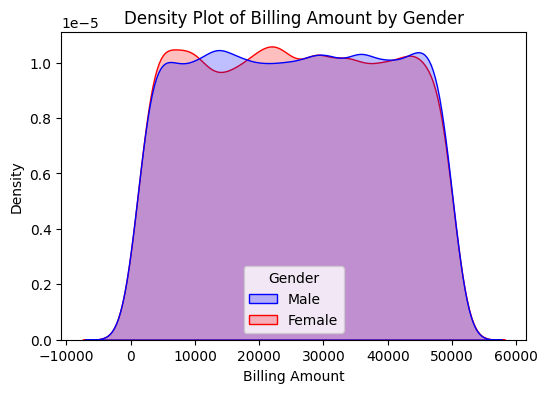

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
df = pd.read_csv("healthcare_dataset.csv")

# Counting the number of patients by gender
gender_counts = df['Gender'].value_counts()

# Calculate percentages
gender_percentages = (gender_counts / gender_counts.sum()) * 100

# Print gender distribution with percentages
print("Distribution of Patients by Gender:")
print(gender_counts)
print("\nPercentage Distribution of Patients by Gender:")
print(gender_percentages)

# Density plot for billing amounts by gender with red and blue colors
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='Billing Amount', hue='Gender', fill=True, palette={'Male': 'blue', 'Female': 'red'})
plt.title('Density Plot of Billing Amount by Gender')
plt.xlabel('Billing Amount')
plt.ylabel('Density')

# Save the density plot before showing
plt.savefig('Gender_Density_Plot.png', format='png', bbox_inches='tight')
plt.show()


Step 4: Medical Condition Analysis (Pie Chart)

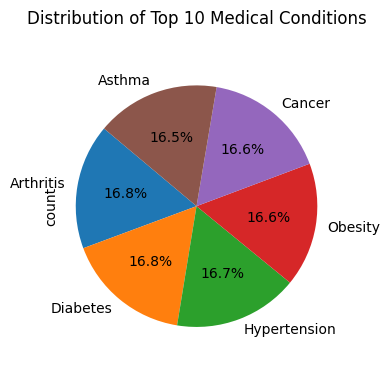

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_csv("healthcare_dataset.csv")

# Counting occurrences of each medical condition
medical_condition_counts = df['Medical Condition'].value_counts()

# Pie chart for top 10 medical conditions
plt.figure(figsize=(4, 4))
medical_condition_counts.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Medical Conditions')
plt.axis('equal')
plt.tight_layout()
# Save the pie chart
plt.savefig('top_10_medical_conditions_pie_chart.png', format='png', bbox_inches='tight')
plt.show()

# Print column names to verify the exact name of the medical condition column
print(df.columns)



Step 5: Blood Type Distribution (Pair Chart)

Blood Type Counts:
Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64

Statistics for 'Billing Amount':
count    55500.000000
mean     25539.316097
std      14211.454431
min      -2008.492140
25%      13241.224652
50%      25538.069376
75%      37820.508436
max      52764.276736
Name: Billing Amount, dtype: float64

Statistics for 'Numerical_Var':
count    55500.000000
mean     12769.658049
std       7105.727215
min      -1004.246070
25%       6620.612326
50%      12769.034688
75%      18910.254218
max      26382.138368
Name: Numerical_Var, dtype: float64


<Figure size 800x600 with 0 Axes>

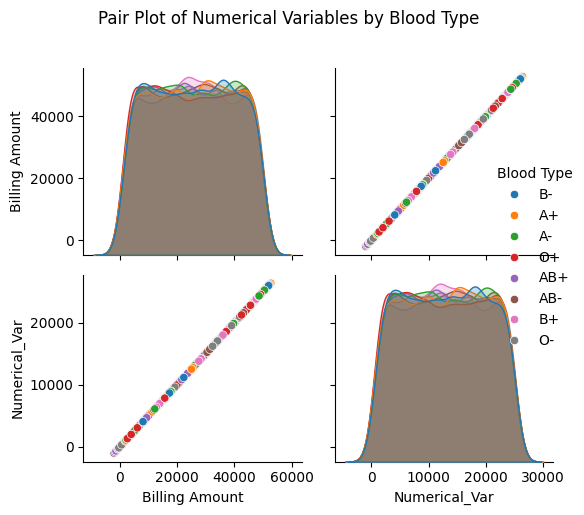

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a DataFrame
df = pd.read_csv("healthcare_dataset.csv")

# Counting occurrences of each blood type
blood_type_counts = df['Blood Type'].value_counts()
print("Blood Type Counts:")
print(blood_type_counts)

# Simulate additional numerical variables for the pair plot
df['Numerical_Var'] = df['Billing Amount'] * 0.5  # Example variable

# Calculate basic statistics for numerical variables
print("\nStatistics for 'Billing Amount':")
print(df['Billing Amount'].describe())

print("\nStatistics for 'Numerical_Var':")
print(df['Numerical_Var'].describe())

# Create the pair plot of numerical variables by blood type
plt.figure(figsize=(8, 6))
pair_plot = sns.pairplot(df, hue='Blood Type', vars=['Billing Amount', 'Numerical_Var'])
plt.suptitle('Pair Plot of Numerical Variables by Blood Type', y=1.02)  # Adjust title position
plt.tight_layout()

# Save the pair plot
plt.savefig('pair_plot_numerical_vars_by_blood_type.png', format='png', bbox_inches='tight')
plt.show()


Step 6: Insurance Provider Analysis ( Area Chart)

Column names in the dataset:
Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

Insurance Provider Counts:
Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

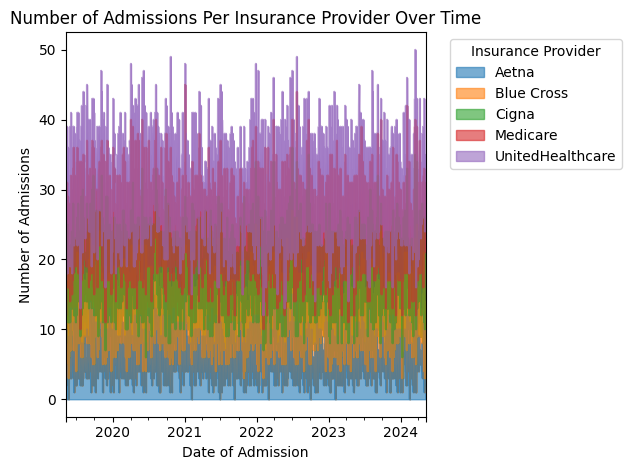

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_csv("healthcare_dataset.csv")

# Print column names to verify the exact names
print("Column names in the dataset:")
print(df.columns)

# Verify the exact column name for date of admission
date_column = 'Date of Admission'  # Replace with the correct column name if different

# Ensure 'Date of Admission' is in datetime format
df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

# Filter out any rows where 'Date of Admission' could not be converted
df = df.dropna(subset=[date_column])

# Counting occurrences of each insurance provider
insurance_counts = df['Insurance Provider'].value_counts()
print("\nInsurance Provider Counts:")
print(insurance_counts)

# Area chart for number of admissions per insurance provider over time
# Grouping data by admission date and insurance provider, then counting occurrences
admissions_by_date = df.groupby([date_column, 'Insurance Provider']).size().unstack().fillna(0)

# Plotting the area chart
plt.figure(figsize=(10, 6))
admissions_by_date.plot(kind='area', stacked=True, alpha=0.6)
plt.title('Number of Admissions Per Insurance Provider Over Time')
plt.xlabel('Date of Admission')
plt.ylabel('Number of Admissions')
plt.legend(title='Insurance Provider', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save the plot as an image file
plt.savefig('admissions_per_insurance_provider_over_time.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()


Step 7: Medication Analysis ( Bar Chart)

Columns in filtered data:
Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')
Sample data from filtered DataFrame:
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     K

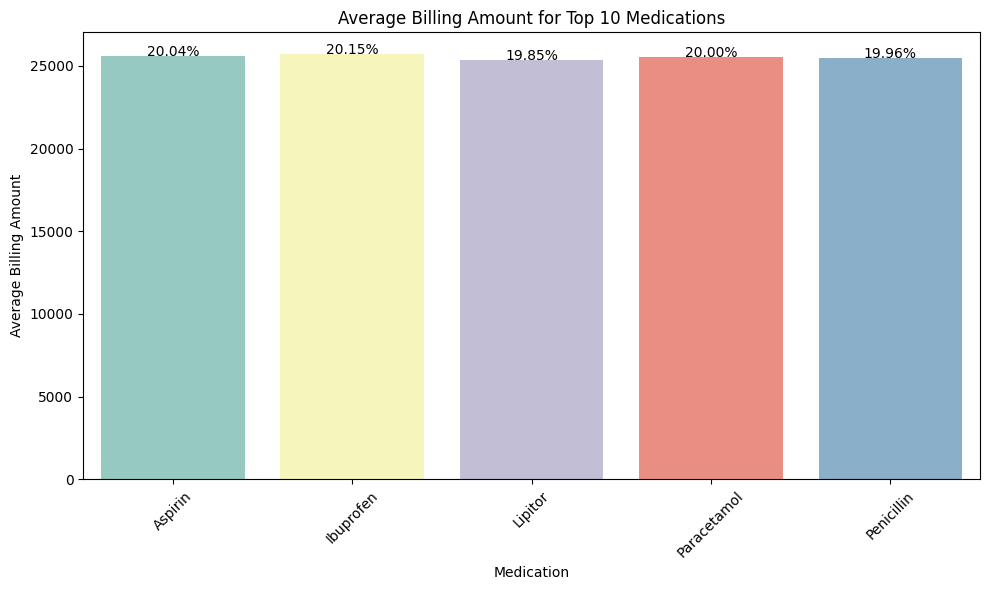

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load the dataset into a DataFrame
df = pd.read_csv("healthcare_dataset.csv")

# Counting occurrences of each medication
medication_counts = df['Medication'].value_counts()

# Top 10 medications by frequency
top_medications = medication_counts.head(10).index

# Filter data for the top 10 medications
top_medications_data = df[df['Medication'].isin(top_medications)]

# Verify the columns in the filtered DataFrame
print("Columns in filtered data:")
print(top_medications_data.columns)

# Check the first few rows of the filtered DataFrame
print("Sample data from filtered DataFrame:")
print(top_medications_data.head())

# Ensure 'Billing Amount' column is present and correctly named
if 'Billing Amount' in top_medications_data.columns:
    # Aggregate the average billing amount for each medication
    medication_avg_billing = top_medications_data.groupby('Medication')['Billing Amount'].mean().reset_index()
    
    # Calculate the total billing amount for the top 10 medications
    total_avg_billing = medication_avg_billing['Billing Amount'].sum()

    # Calculate the percentage of each medication's average billing amount relative to the total
    medication_avg_billing['Percentage'] = (medication_avg_billing['Billing Amount'] / total_avg_billing) * 100

    # Generate a bar plot for the average billing amounts associated with the top 10 medications
    plt.figure(figsize=(10, 6))  # Adjust size for better visibility
    bar_plot = sns.barplot(x='Medication', y='Billing Amount', data=medication_avg_billing, palette='Set3')
    plt.title('Average Billing Amount for Top 10 Medications')
    plt.xlabel('Medication')
    plt.ylabel('Average Billing Amount')
    plt.xticks(rotation=45)
    
    # Annotate the bar plot with percentage values
    for index, row in medication_avg_billing.iterrows():
        bar_plot.text(
            index,
            row['Billing Amount'] + 0.5,
            f"{row['Percentage']:.2f}%",
            color='black',
            ha='center'
        )
    
    plt.tight_layout()
    
    # Save the plot as an image file
    plt.savefig('average_billing_amount_top_10_medications_with_percentage.png', format='png', bbox_inches='tight')
    
    # Show the plot
    plt.show()
else:
    print("Column 'Billing Amount' not found in the filtered data.")


Step 8: Regression Analysis between Age and Medical Conditions

                            OLS Regression Results                            
Dep. Variable:      Medical Condition   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4379
Date:                Sat, 20 Jul 2024   Prob (F-statistic):              0.508
Time:                        07:01:57   Log-Likelihood:            -1.0847e+05
No. Observations:               55500   AIC:                         2.169e+05
Df Residuals:                   55498   BIC:                         2.170e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5115      0.020    123.120      0.0

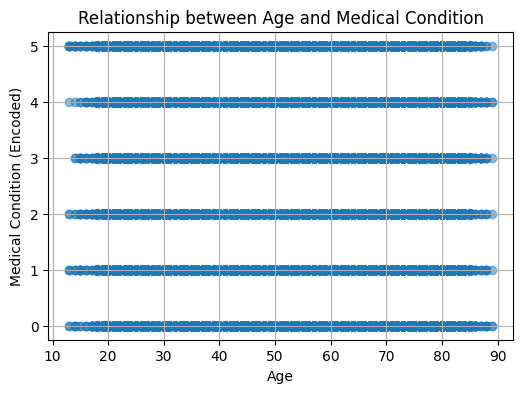

Regression Equation: Medical Condition = -0.00 * Age + 2.51


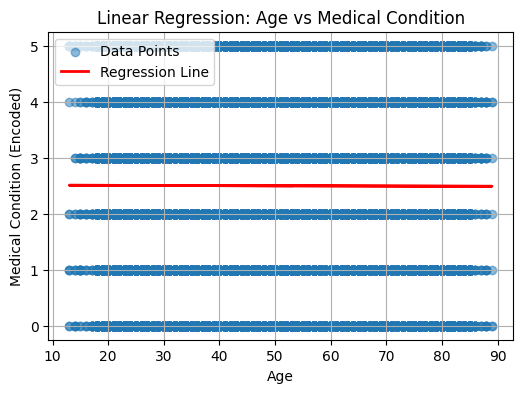

In [77]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Load the dataset into a DataFrame
df = pd.read_csv("healthcare_dataset.csv")

# Check for required columns
assert 'Age' in df.columns and 'Medical Condition' in df.columns, "Ensure 'Age' and 'Medical Condition' columns exist in your dataset."

# Convert 'Medical Condition' to numerical labels
label_encoder = LabelEncoder()
df['Medical Condition'] = label_encoder.fit_transform(df['Medical Condition'])

# Define features and target variable
X = df[['Age']]
y = df['Medical Condition']

# Add a constant (intercept) to the features matrix
X = sm.add_constant(X)

# Fit the OLS regression model
ols_model = sm.OLS(y, X).fit()

# Print the summary of the OLS regression model
print(ols_model.summary())

# Scatter plot: Age vs Medical Condition
plt.figure(figsize=(6, 4))
plt.scatter(df['Age'], df['Medical Condition'], alpha=0.5)
plt.title('Relationship between Age and Medical Condition')
plt.xlabel('Age')
plt.ylabel('Medical Condition (Encoded)')
plt.grid(True)
plt.show()

# Linear Regression with sklearn
lr_model = LinearRegression()
lr_model.fit(X[['Age']], y)

# Get the coefficients
slope = lr_model.coef_[0]
intercept = lr_model.intercept_

# Print the regression equation
print(f"Regression Equation: Medical Condition = {slope:.2f} * Age + {intercept:.2f}")

# Plotting regression line
plt.figure(figsize=(6, 4))
plt.scatter(X[['Age']], y, alpha=0.5, label='Data Points')
plt.plot(X[['Age']], lr_model.predict(X[['Age']]), color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Age vs Medical Condition')
plt.xlabel('Age')
plt.ylabel('Medical Condition (Encoded)')
plt.grid(True)
plt.legend()
plt.show()



Step 9: ANOVA Test

In [57]:
# Converting 'Medical Condition' to numeric format (label encoding)
df['Medical Condition'] = pd.factorize(df['Medical Condition'])[0]

# Grouping by Age and collect 'Medical Condition'
anova_age = df.groupby('Age')['Medical Condition'].apply(list)

# Performing ANOVA
f_statistic, p_value = f_oneway(*anova_age.values)
print(f"ANOVA Results for Age Groups: F = {f_statistic}, p = {p_value}")

# Interpreting Results
if p_value < 0.05:
    print("There is a significant difference in medical conditions across different age groups.")
else:
    print("There is no significant difference in medical conditions across different age groups.")


ANOVA Results for Age Groups: F = 0.9280509814203598, p = 0.6554233892595381
There is no significant difference in medical conditions across different age groups.


Step 10: Chi-Square Independence Test

In [58]:
# Contingency table for insurance providers vs. medical conditions
contingency_table = pd.crosstab(df['Insurance Provider'], df['Medical Condition'])

# Performing Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Printing Chi-Square results
print(f"Chi-Square Results for Medical Conditions across Insurance Providers:")
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpreting the results
alpha = 0.05
if p_value < alpha:
    print("There are significant differences in medical conditions across insurance providers.")
else:
    print("There are no significant differences in medical conditions across insurance providers.")

# Contingency table for gender vs. medical conditions
contingency_table = pd.crosstab(df['Gender'], df['Medical Condition'])

# Performing Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Printing Chi-Square results
print(f"Chi-Square Results for Medical Conditions across Genders:")
print(f"Chi-Square statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpreting the results
if p_value < alpha:
    print("There are significant differences in medical conditions across genders.")
else:
    print("There are no significant differences in medical conditions across genders.")


Chi-Square Results for Medical Conditions across Insurance Providers:
Chi-Square statistic: 14.478233090141817
P-value: 0.8054447875790507
There are no significant differences in medical conditions across insurance providers.
Chi-Square Results for Medical Conditions across Genders:
Chi-Square statistic: 1.2017873650693678
P-value: 0.9447057765170073
There are no significant differences in medical conditions across genders.
